In [6]:
%run ../__init__.py

In [47]:
%matplotlib inline

In [8]:
budget = pd.read_csv('../data/school_budget_train.csv')

In [9]:
budget_df = pd.DataFrame(budget)

budget_df.head()

,Unnamed: 0,Function,Use,Sharing,Reporting,Student_Type,Position_Type,Object_Type,Pre_K,Operating_Status,...,Sub_Object_Description,Location_Description,FTE,Function_Description,Facility_or_Department,Position_Extra,Total,Program_Description,Fund_Description,Text_1
0,134338,Teacher Compensation,Instruction,School Reported,School,NO_LABEL,Teacher,NO_LABEL,NO_LABEL,PreK-12 Operating,...,NaN,NaN,1.0,NaN,NaN,KINDERGARTEN,50471.810,KINDERGARTEN,General Fund,NaN
1,206341,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,Non-Operating,...,NaN,NaN,NaN,RGN GOB,NaN,UNDESIGNATED,3477.860,BUILDING IMPROVEMENT SERVICES,NaN,BUILDING IMPROVEMENT SERVICES
2,326408,Teacher Compensation,Instruction,School Reported,School,Unspecified,Teacher,Base Salary/Compensation,Non PreK,PreK-12 Operating,...,NaN,NaN,1.0,NaN,NaN,TEACHER,62237.130,Instruction - Regular,General Purpose School,NaN
3,364634,Substitute Compensation,Instruction,School Reported,School,Unspecified,Substitute,Benefits,NO_LABEL,PreK-12 Operating,...,NaN,NaN,NaN,UNALLOC BUDGETS/SCHOOLS,NaN,PROFESSIONAL-INSTRUCTIONAL,22.300,GENERAL MIDDLE/JUNIOR HIGH SCH,NaN,REGULAR INSTRUCTION
4,47683,Substitute Compensation,Instruction,School Reported,School,Unspecified,Teacher,Substitute Compensation,NO_LABEL,PreK-12 Operating,...,NaN,NaN,NaN,NON-PROJECT,NaN,PROFESSIONAL-INSTRUCTIONAL,54.166,GENERAL HIGH SCHOOL EDUCATION,NaN,REGULAR INSTRUCTION


In [10]:
budget_df.columns = ['ID' if x=='Unnamed: 0' else x for x in budget_df.columns]

In [11]:
budget_df.shape

(400277, 26)

In [12]:
budget_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400277 entries, 0 to 400276
Data columns (total 26 columns):
ID                        400277 non-null int64
Function                  400277 non-null object
Use                       400277 non-null object
Sharing                   400277 non-null object
Reporting                 400277 non-null object
Student_Type              400277 non-null object
Position_Type             400277 non-null object
Object_Type               400277 non-null object
Pre_K                     400277 non-null object
Operating_Status          400277 non-null object
Object_Description        375493 non-null object
Text_2                    88217 non-null object
SubFund_Description       306855 non-null object
Job_Title_Description     292743 non-null object
Text_3                    179964 non-null object
Text_4                    53746 non-null object
Sub_Object_Description    91603 non-null object
Location_Description      162054 non-null object
FTE        

In [13]:
targets = ['Function', 'Use', 'Sharing', 'Reporting', 'Student_Type',
       'Position_Type', 'Object_Type', 'Pre_K', 'Operating_Status']

In [14]:
predictors = [col for col in budget_df.columns if col not in targets]
word_predictors = ['Object_Description','Text_2','SubFund_Description','Job_Title_Description','Text_3','Text_4',
                   'Sub_Object_Description','Location_Description','Function_Description','Facility_or_Department','Position_Extra',
                   'Program_Description','Fund_Description','Text_1']

num_predictors = ['FTE', 'Total']

In [15]:
predictors

['ID',
 'Object_Description',
 'Text_2',
 'SubFund_Description',
 'Job_Title_Description',
 'Text_3',
 'Text_4',
 'Sub_Object_Description',
 'Location_Description',
 'FTE',
 'Function_Description',
 'Facility_or_Department',
 'Position_Extra',
 'Total',
 'Program_Description',
 'Fund_Description',
 'Text_1']

### Change label columns, append category names to labels

In [16]:
for col in budget_df[targets]:
    budget_df[col] = str(col)+'__'+ budget_df[col].astype(str)

In [17]:
budget_df[targets].head()

,Function,Use,Sharing,Reporting,Student_Type,Position_Type,Object_Type,Pre_K,Operating_Status
0,Function__Teacher Compensation,Use__Instruction,Sharing__School Reported,Reporting__School,Student_Type__NO_LABEL,Position_Type__Teacher,Object_Type__NO_LABEL,Pre_K__NO_LABEL,Operating_Status__PreK-12 Operating
1,Function__NO_LABEL,Use__NO_LABEL,Sharing__NO_LABEL,Reporting__NO_LABEL,Student_Type__NO_LABEL,Position_Type__NO_LABEL,Object_Type__NO_LABEL,Pre_K__NO_LABEL,Operating_Status__Non-Operating
2,Function__Teacher Compensation,Use__Instruction,Sharing__School Reported,Reporting__School,Student_Type__Unspecified,Position_Type__Teacher,Object_Type__Base Salary/Compensation,Pre_K__Non PreK,Operating_Status__PreK-12 Operating
3,Function__Substitute Compensation,Use__Instruction,Sharing__School Reported,Reporting__School,Student_Type__Unspecified,Position_Type__Substitute,Object_Type__Benefits,Pre_K__NO_LABEL,Operating_Status__PreK-12 Operating
4,Function__Substitute Compensation,Use__Instruction,Sharing__School Reported,Reporting__School,Student_Type__Unspecified,Position_Type__Teacher,Object_Type__Substitute Compensation,Pre_K__NO_LABEL,Operating_Status__PreK-12 Operating


In [18]:
categorize_label = lambda x: x.astype('category')
budget_df[targets] = budget_df[targets].apply(categorize_label, axis=0)

In [19]:
budget_df.dtypes

ID                           int64
Function                  category
Use                       category
Sharing                   category
Reporting                 category
Student_Type              category
Position_Type             category
Object_Type               category
Pre_K                     category
Operating_Status          category
Object_Description          object
Text_2                      object
SubFund_Description         object
Job_Title_Description       object
Text_3                      object
Text_4                      object
Sub_Object_Description      object
Location_Description        object
FTE                        float64
Function_Description        object
Facility_or_Department      object
Position_Extra              object
Total                      float64
Program_Description         object
Fund_Description            object
Text_1                      object
dtype: object

### Fill NaN values with empty strings

In [20]:
budget_df[predictors].isnull().sum().sort_values()

ID                             0
Total                       4555
Object_Description         24784
Function_Description       58082
SubFund_Description        93422
Program_Description        95617
Job_Title_Description     107534
Text_1                    107992
Position_Extra            135513
Fund_Description          197400
Text_3                    220313
Location_Description      238223
FTE                       274206
Sub_Object_Description    308674
Text_2                    312060
Facility_or_Department    346391
Text_4                    346531
dtype: int64

In [21]:
for col in budget_df[word_predictors]:
    budget_df[col] = budget_df[word_predictors].loc[:,[col]].fillna(' ')

In [22]:
budget_df[predictors].isnull().sum()

ID                             0
Object_Description             0
Text_2                         0
SubFund_Description            0
Job_Title_Description          0
Text_3                         0
Text_4                         0
Sub_Object_Description         0
Location_Description           0
FTE                       274206
Function_Description           0
Facility_or_Department         0
Position_Extra                 0
Total                       4555
Program_Description            0
Fund_Description               0
Text_1                         0
dtype: int64

In [23]:
budget_df.describe()

,ID,FTE,Total
count,400277.000000,126071.000000,3.957220e+05
mean,225186.018537,0.426794,1.310586e+04
std,130025.142718,0.573576,3.682254e+05
min,2.000000,-0.087551,-8.746631e+07
25%,112601.000000,0.000792,7.379770e+01
50%,225243.000000,0.130927,4.612300e+02
75%,337722.000000,1.000000,3.652662e+03
max,450340.000000,46.800000,1.297000e+08


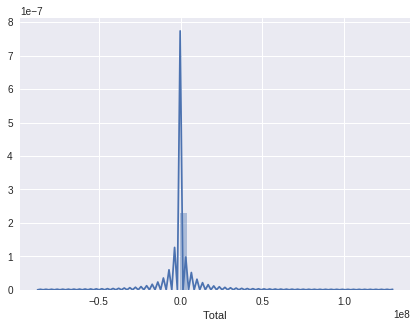

In [24]:
plt.figure(1, figsize=(7,5))
_ = sns.distplot(budget_df['Total'].dropna())

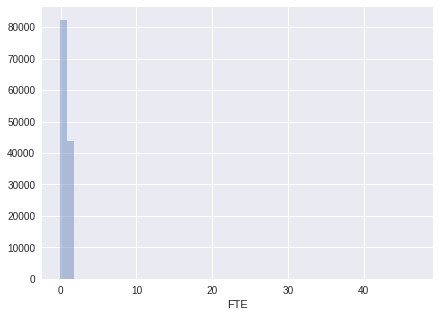

In [51]:
plt.figure(1, figsize=(7,5))
_ = sns.distplot(budget_df['FTE'].dropna(), kde=False)

## Figure out what to do with NaN values for numerical columns

## Data processesing with word predictor columns

In [26]:
for col in budget_df[word_predictors]:
    budget_df[col] = budget_df[col].str.lower()

In [27]:
budget_df[word_predictors].head(10)

,Object_Description,Text_2,SubFund_Description,Job_Title_Description,Text_3,Text_4,Sub_Object_Description,Location_Description,Function_Description,Facility_or_Department,Position_Extra,Program_Description,Fund_Description,Text_1
0,,,,teacher-elementary,,,,,,,kindergarten,kindergarten,general fund,
1,contractor services,bond expenditures,building fund,(blank),regular,,,,rgn gob,,undesignated,building improvement services,,building improvement services
2,personal services - teachers,,,tcher 2nd grade,,regular instruction,,,,,teacher,instruction - regular,general purpose school,
3,employee benefits,teacher subs,general fund,"teacher, short term sub",regular,,,,unalloc budgets/schools,,professional-instructional,general middle/junior high sch,,regular instruction
4,teacher coverage for teacher,teacher subs,general fund,"teacher, secondary (high)",alternative,,,,non-project,,professional-instructional,general high school education,,regular instruction
5,contra benefits,,general fund,custodian - pt - jobs,n/a,,,,non-project,,undesignated,employee benefits,,employee benefits
6,educational,special education instruction,local,,,,,,,,supplies and materials,special education local,local fund,
7,employee benefits,,general fund,"sub manager, food service",n/a,,,district wide organization uni,non-project,,undesignated,undesignated,,undesignated
8,employee benefits,,general fund,"teacher, elementary",regular,,,,ela s - teaching spanish only,,professional-instructional,general elementary education,,regular instruction
9,employee benefits,teacher subs,general fund,"teacher,retrd shrt term sub",regular,,,,unalloc budgets/schools,,professional-instructional,general elementary education,,regular instruction


In [28]:
def cleaner(text):
    text = re.sub('[\W]',' ',text)
    text = re.sub("\\s+", " ", text)
    return text
    

In [29]:
for col in budget_df[word_predictors]:
    budget_df[col] = budget_df[col].apply(cleaner)

In [30]:
budget_df[word_predictors].head()

,Object_Description,Text_2,SubFund_Description,Job_Title_Description,Text_3,Text_4,Sub_Object_Description,Location_Description,Function_Description,Facility_or_Department,Position_Extra,Program_Description,Fund_Description,Text_1
0,,,,teacher elementary,,,,,,,kindergarten,kindergarten,general fund,
1,contractor services,bond expenditures,building fund,blank,regular,,,,rgn gob,,undesignated,building improvement services,,building improvement services
2,personal services teachers,,,tcher 2nd grade,,regular instruction,,,,,teacher,instruction regular,general purpose school,
3,employee benefits,teacher subs,general fund,teacher short term sub,regular,,,,unalloc budgets schools,,professional instructional,general middle junior high sch,,regular instruction
4,teacher coverage for teacher,teacher subs,general fund,teacher secondary high,alternative,,,,non project,,professional instructional,general high school education,,regular instruction


In [31]:
unique_values = []
for col in budget_df[word_predictors]:
    unique_vals = budget_df[col].nunique()
    unique_values.append({'column_name': col,
                        'unique_vals': unique_vals})

In [32]:
pd.DataFrame(unique_values)

,column_name,unique_vals
0,Object_Description,586
1,Text_2,282
2,SubFund_Description,268
3,Job_Title_Description,3327
4,Text_3,36
5,Text_4,241
6,Sub_Object_Description,167
7,Location_Description,353
8,Function_Description,653
9,Facility_or_Department,176


In [33]:
def value_counts(col):
    counts = budget_df[col].value_counts()
    percent = budget_df[col].value_counts(normalize=True)
    return pd.DataFrame({'counts': counts, 
                         'percent': percent})

In [34]:
Object_Description = value_counts('Object_Description')
Text_2 = value_counts('Text_2')
SubFund_Description = value_counts('SubFund_Description')
Job_Title_Description = value_counts('Job_Title_Description')
Text_3 = value_counts('Text_3')
Text_4 = value_counts('Text_4')
Sub_Object_Description = value_counts('Sub_Object_Description')
Location_Description = value_counts('Location_Description')
Function_Description = value_counts('Function_Description')
Facility_or_Department = value_counts('Facility_or_Department')
Position_Extra = value_counts('Position_Extra')
Program_Description = value_counts('Program_Description')
Fund_Description = value_counts('Fund_Description')
Text_1 = value_counts('Text_1')

In [ ]:
# fig = plt.figure(figsize=(40,40))
# for i, col in enumerate(df_cat):
#     fig.add_subplot(7,7,i+1)
#     fig.suptitle("Categorical Features", fontsize=25)
#     col = value_counts(col)
#     col.plot.bar(alpha = 0.5, color='g')

In [44]:
Operating_Status = value_counts('Operating_Status')


,counts,percent
Operating_Status__PreK-12 Operating,343578,0.858351
Operating_Status__Non-Operating,48034,0.120002
"Operating_Status__Operating, Not PreK-12",8665,0.021648


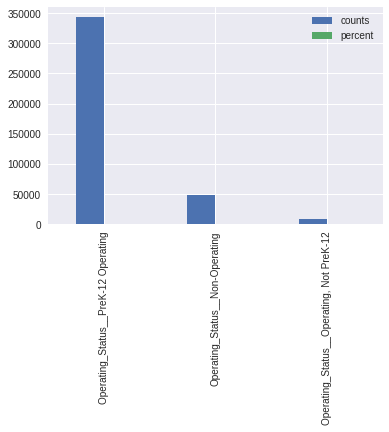

In [49]:
Operating_Status.plot.bar()

In [43]:
Pre_K = value_counts('Pre_K')
Pre_K

,counts,percent
Pre_K__NO_LABEL,306425,0.765532
Pre_K__Non PreK,81069,0.202532
Pre_K__PreK,12783,0.031935


In [42]:
Object_Type = value_counts('Object_Type')
Object_Type

,counts,percent
Object_Type__Base Salary/Compensation,97670,0.244006
Object_Type__Benefits,85467,0.213520
Object_Type__NO_LABEL,69644,0.173990
Object_Type__Other Compensation/Stipend,61685,0.154106
Object_Type__Supplies/Materials,31935,0.079782
Object_Type__Substitute Compensation,27357,0.068345
Object_Type__Contracted Services,7512,0.018767
Object_Type__Other Non-Compensation,6297,0.015732
Object_Type__Travel & Conferences,5030,0.012566
Object_Type__Equipment & Equipment Lease,4460,0.011142


In [41]:
Position_Type = value_counts('Position_Type')
Position_Type

,counts,percent
Position_Type__Teacher,102788,0.256792
Position_Type__NO_LABEL,97607,0.243849
Position_Type__Substitute,63515,0.158678
Position_Type__Other,37614,0.093970
Position_Type__TA,22799,0.056958
Position_Type__Non-Position,20996,0.052454
Position_Type__Custodian,9713,0.024266
Position_Type__Sec/Clerk/Other Admin,8814,0.022020
Position_Type__Coordinator/Manager,7407,0.018505
Position_Type__Instructional Coach,5148,0.012861


In [40]:
Student_Type = value_counts('Student_Type')
Student_Type

,counts,percent
Student_Type__Unspecified,223026,0.557179
Student_Type__NO_LABEL,99871,0.249505
Student_Type__Special Education,42024,0.104987
Student_Type__Poverty,17845,0.044582
Student_Type__ELL,6752,0.016868
Student_Type__PreK,5561,0.013893
Student_Type__At Risk,3132,0.007825
Student_Type__Gifted,1595,0.003985
Student_Type__Alternative,471,0.001177


In [39]:
Reporting = value_counts('Reporting')
Reporting

,counts,percent
Reporting__School,257258,0.642700
Reporting__Non-School,86320,0.215651
Reporting__NO_LABEL,56699,0.141649


In [38]:
Sharing = value_counts('Sharing')
Sharing

,counts,percent
Sharing__School Reported,254433,0.635642
Sharing__NO_LABEL,59376,0.148337
Sharing__Shared Services,42641,0.106529
Sharing__School on Central Budgets,26849,0.067076
Sharing__Leadership & Management,16978,0.042416


In [37]:
Use = value_counts('Use')
Use

,counts,percent
Use__Instruction,203608,0.508668
Use__NO_LABEL,78712,0.196644
Use__O&M,45868,0.114591
Use__ISPD,26118,0.065250
Use__Pupil Services & Enrichment,23779,0.059406
Use__Leadership,15715,0.039260
Use__Business Services,6120,0.015289
Use__Untracked Budget Set-Aside,357,0.000892


In [36]:
Function = value_counts('Function')
Function

,counts,percent
Function__Teacher Compensation,86354,0.215736
Function__Substitute Compensation,62215,0.155430
Function__NO_LABEL,59579,0.148844
Function__Aides Compensation,19858,0.049611
Function__Instructional Materials & Supplies,19711,0.049243
Function__Facilities & Maintenance,19617,0.049009
Function__Professional Development,19102,0.047722
Function__Student Transportation,14371,0.035903
Function__Food Services,14203,0.035483
Function__School Administration,13055,0.032615


In [31]:
Object_Description.head(20)

,counts,percent
employee benefits,47495,0.118655
salaries of part time employee,31761,0.079348
,24784,0.061917
salaries of regular employees,24319,0.060755
contra benefits,19381,0.048419
salaries and wages for teachers and other professi,18632,0.046548
additional extra duty pay stip,16841,0.042073
supplies,13117,0.032770
retirement contrib,13073,0.032660
regular,9270,0.023159


In [32]:
Text_2.head(20)

,counts,percent
,312060,0.779610
teacher subs,16599,0.041469
food services,5871,0.014667
general education,4251,0.010620
transportation,3945,0.009856
custodial schools,3860,0.009643
teacher learning leadership,2878,0.007190
teacher,2710,0.006770
severe disabilities,2610,0.006520
maintenance,2483,0.006203


In [33]:
SubFund_Description.head(20)

,counts,percent
general fund,123327,0.308104
,93422,0.233393
operations,26895,0.067191
federal gdpg fund fy,13562,0.033882
support services instructional staff,10238,0.025577
special instruction,10106,0.025248
district special revenue funds,9975,0.024920
local,9393,0.023466
arra stimulus,7458,0.018632
community services,7386,0.018452


In [34]:
Job_Title_Description.head(20)

,counts,percent
,107541,0.268666
teacher elementary,32834,0.082028
teacher short term sub,23450,0.058584
blank,15235,0.038061
teacher secondary high,8994,0.022469
teacher retrd shrt term sub,8746,0.021850
teacher regular,8517,0.021278
teacher substitute pool,7115,0.017775
sub teacher all,7018,0.017533
teacher secondary middle,6912,0.017268


In [35]:
Text_3.head(20)

,counts,percent
,220313,0.550401
regular,94462,0.235992
n a,70812,0.176907
turnaround,7755,0.019374
alternative,5299,0.013238
charter,664,0.001659
new closed schl,623,0.001556
other materials and supplies,60,0.000150
supplies for instruction,42,0.000105
employee travel,41,0.000102


In [36]:
Text_4.head(20)

,counts,percent
,346531,0.865728
regular instruction,10762,0.026886
basic educational services district objective,9481,0.023686
undistributed,7106,0.017753
special education instruction,2892,0.007225
regular salary,2157,0.005389
regular instructional support,1899,0.004744
transportation second runs,1852,0.004627
transportation bus drivers,1257,0.003140
office of principal,1072,0.002678


In [37]:
Sub_Object_Description.head(20)

,counts,percent
,308674,0.771151
extra duty pay overtime for support personnel,9159,0.022882
certificated employees salaries and wages,8724,0.021795
salaries and wages for teachers and other professi,7285,0.018200
salaries and wages for substitute teachers,6327,0.015807
general supplies,5833,0.014572
salaries or wages for support personnel,4824,0.012052
supplies and materials,3273,0.008177
extended day,3045,0.007607
extra duty wages,2730,0.006820


In [38]:
Location_Description.head(20)

,counts,percent
,238223,0.595145
school,65524,0.163697
admin services,7749,0.019359
unallocated,6005,0.015002
special education,5485,0.013703
undistributed,5309,0.013263
district wide resources,3626,0.009059
opportunity school,3044,0.007605
transportation,2788,0.006965
teacher learning leadership,2482,0.006201


In [39]:
Function_Description.head(20)

,counts,percent
non project,76890,0.192092
,58082,0.145105
instruction,39932,0.099761
unalloc budgets schools,16616,0.041511
basic fefp k 12,13317,0.033269
employee retirement,13073,0.032660
disadvantaged youth,7814,0.019521
ela e teaching sheltered eng,6311,0.015767
instruction and curriculum development services,6043,0.015097
inst staff training svcs,4957,0.012384


In [40]:
Facility_or_Department.head(20)

,counts,percent
,346391,0.865378
all campus payroll,17697,0.044212
instruction and curriculum,14537,0.036317
transportation department,5542,0.013845
child nutrition,3405,0.008507
custodial department,2173,0.005429
athletic department,773,0.001931
finance department,474,0.001184
writing teams,438,0.001094
performing arts department,384,0.000959


In [41]:
Position_Extra.head(20)

,counts,percent
,135513,0.338548
professional instructional,92136,0.230181
undesignated,48273,0.120599
crafts trades and services,13015,0.032515
paraprofessional,12639,0.031576
teacher bachelor,11875,0.029667
substitute teacher,9622,0.024038
office administrative support,6437,0.016081
professional other,5842,0.014595
teacher master,5114,0.012776


In [42]:
Program_Description.head(20)

,counts,percent
,95617,0.238877
general elementary education,32829,0.082016
employee benefits,32669,0.081616
instructional staff training,21521,0.053765
undistributed,18547,0.046335
instruction regular,13825,0.034539
misc,13143,0.032835
general high school education,10625,0.026544
basic educational services,10593,0.026464
title i part a schoolwide activities related to state comp,8520,0.021285


In [43]:
Fund_Description.head(20)

,counts,percent
,197400,0.493158
general operating fund,33467,0.083610
general fund,29036,0.072540
general fund,28176,0.070391
general purpose school,20333,0.050797
title i disadvantaged children targeted assistance,19967,0.049883
general,7877,0.019679
title part a improving basic programs,6885,0.017201
special trust,6335,0.015827
school federal projects,5424,0.013551


In [45]:
Text_1.head(20)

,counts,percent
,108076,0.270003
regular instruction,64896,0.162128
employee benefits,32669,0.081616
instructional staff,30592,0.076427
regular pay,18609,0.046490
special education,9778,0.024428
operation and maint of plant,9161,0.022887
food services operations,5857,0.014632
school administration,5575,0.013928
students,4864,0.012152


In [56]:
budget_df['combined_text'] = budget_df[word_predictors].apply(lambda x: " ".join(x), axis=1)

In [111]:
budget_df['combined_text'].nunique()


51230

In [57]:
combined_text = value_counts('combined_text')

In [59]:
combined_text.head()

,counts,percent
contra benefits general fund teacher elementary n a non project undesignated employee benefits employee benefits,4130,0.010318
salaries of part time employee teacher subs general fund teacher short term sub regular unalloc budgets schools professional instructional general elementary education regular instruction,3578,0.008939
personal services substitute teachers certified regular instruction substitute teacher instruction regular general purpose school,3269,0.008167
supplies primary grades program instruction primary grades program general fund,3140,0.007845
employee benefits teacher subs general fund teacher short term sub regular unalloc budgets schools professional instructional general elementary education regular instruction,2951,0.007372
